In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

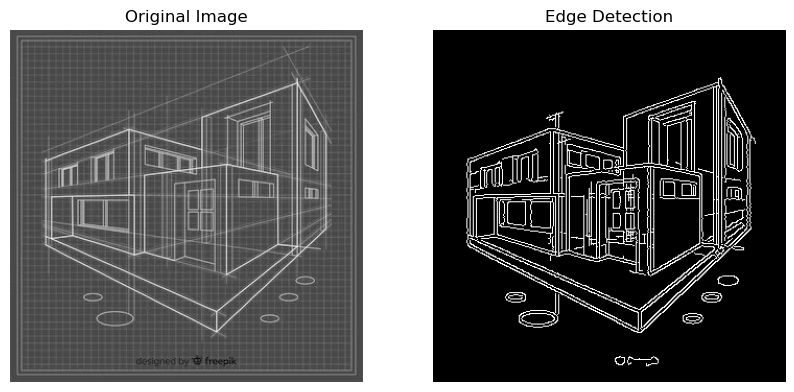

In [4]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(r"C:\Users\KIIT\Downloads\3D_Image.jpeg", cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")
    
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    edges = cv2.Canny(blurred_image, 50, 150)
    
    return image, edges

image_path = r"C:\Users\KIIT\Downloads\3D_Image.jpeg" 
original_image, edges = load_and_preprocess_image(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


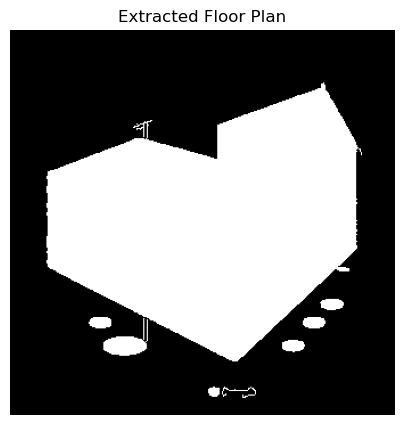

In [5]:
def extract_floor_plan(edges):

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    floor_plan = np.zeros_like(edges)
    
    cv2.drawContours(floor_plan, contours, -1, (255), thickness=cv2.FILLED)
    
    return floor_plan

floor_plan = extract_floor_plan(edges)

# Display the floor plan
plt.figure(figsize=(5, 5))
plt.title("Extracted Floor Plan")
plt.imshow(floor_plan, cmap='gray')
plt.axis('off')
plt.show()
